# Moth - Můra
MUNI Omniscient Tutor Helper - Masaryk University Repository Analyzer

This tool was created as a part of the thesis *"Measuring Software Development Contributions using Git"* thesis at Masaryk University.
The goal of this tool is to analyze git repositories of students and provide useful information to teacher about their work.

The implementation is originally written in Python 3.9 and uses the following libraries without which the tool would not be possible:
- [levenshtein](https://pypi.org/project/python-Levenshtein/) - for fuzzy matching in syntactic analysis
- [GitPython](https://gitpython.readthedocs.io/en/stable/) - for git operations
- [python-gitlab](https://python-gitlab.readthedocs.io/en/stable/) - for interfacing with GitLab
- [PyGithub](https://pygithub.readthedocs.io/en/latest/) - for interfacing with GitHub
- [matplotlib](https://matplotlib.org/) - for plotting various graphs
- [notebook](https://jupyter.org/) - for the front-end you are currently using

Below are the necessary imports for the tool to work.

In [1]:
import fs_access as file_system
import lib
import mura
import configuration
import semantic_analysis

from uni_chars import *  # shortcut for unicode characters used throughout the tool
from history_analyzer import CommitRange

from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))  # wide screen support

# macros for automagically reloading the modules when they are changed
%load_ext autoreload
%autoreload 2

# Configuration

The following code block is a shortcut for opening the configuration folder. The configuration folder contains all the configuration files and rules.
Uncomment the line to open the folder.

In [2]:
# configuration.open_configuration_folder()


Configuration is split into multiple files each grouping settings for a specific part of the tool.

## Configuration file
- `configuration_data/configuration.txt` - contains general configuration of the tool
- `lang-syntax/*` - contains weight definitions for general syntax of a language
- `lang-semantics/*` - contains weight definitions for semantic constructs
- `remote-repo-weigths/weights.txt` - contains weight definitions for remote repository objects

## Rules file

- `configuration_data/rules.txt` - contains rules for the tool

Once the configuration is set, run the code block below to load the configurations into the tool.

In [3]:
config = configuration.validate()

# All properties of the config can be edited here. I recommend an editor with code completion support.

config.ignore_remote_repo = True

ℹ️ Loading general configuration!
✅ General configuration loaded successfully!
ℹ️ GitLab access token found! It will be validated when repository is set!
ℹ️ GitHub access token found! It will be validated when repository is set!
ℹ️ Loading rules!
 - Rule: All contributors must have at least 1 file/s matching: `.*Controller.*\.java` in a directory matching: `*`
 - Rule: All contributors must have at least 1 file/s matching: `.*Test.*\.java` in a directory matching: `*`
 - Rule: All contributors must have at least 1 file/s matching: `pom\.xml` in a directory matching: `*`

✅ Rules loaded successfully!
✅ Configuration loaded successfully!

ℹ️ Semantic analyzers available:
➕ Semantic analyzer for .cs extension
 -> Launch command in 'target': dotnet CSharpAST.dll
⚠️ Setup file exists! It contains the following information:
Semantic analyzer for .NET projects.

Requires dotnet 6.0 or higher to run. Make sure dotnet is in your PATH.

➕ Semantic analyzer for .java extension
 -> Launch command 

Semantic analyzers for each extension are executed only if the extension is present in the repository. Therefore, it is not required to have all the prerequisites installed if the project does not include those extensions.

# Contributors

Often times contributors do not have a synchronized git configuration across all development devices. This can lead to the tool not being able to properly identify the contributors. The tool attempts to match contributors by their name and email. If that is not enough an explicit name-to-name mapping can be provided in the `contributor_map` variable.

In [4]:
contributor_map = \
    [
        # ('Jiří Šťastný', 'Jiri Stastny'),
    ]

config.contributor_map = contributor_map

# Uncomment the following line to enable anonymous mode, which will replace the names of the contributors with "Contributor #n"
# config.anonymous_mode = False

# Repository

Put the path to the repository you want to analyze into the `repo_path` variable and run the code block below.

In [5]:
repository_path = r"C:\MUNI\last\Java\M1\pa165_language_school"
repository_path = r"C:\MUNI\last\Java\M1\pa165-team-delta"
repository_path = r"C:\MUNI\last\Java\M1\airport-manager"
repository_path = r"C:\MUNI\last\Java\M1\pa165-formula-one-team"
# repository_path = r"C:\MUNI\last\Java\M1\pa165-movie-recommendation-project"

repository = file_system.validate_repository(repository_path, config)

✅ Repository path 'C:\MUNI\last\Java\M1\pa165-formula-one-team' points to a repository
ℹ️ Skipping remote repositories as 'config.ignore_remote_repo = True'


# Commit range

The commit range is defined by the `start` and `end` variables. The variables can be either a commit hash or a tag/branch name.
Additionally, the `end` variable can be set to `ROOT` and `start` to `HEAD` to analyze the repository from the beginning to the current state.

In [6]:
start = "HEAD"
end = "ROOT"

commit_range = CommitRange(start, end, verbose=True)

✅ Commit range: d910f589ba4069c72181d8f90761f7f25f4aa8c6...112d2c52d119e6dba10487cc7977d23ceb63064f
 - Final commit on: 2023-03-27 00:43:30+02:00
 - Initial commit on: 2023-03-03 14:52:22+01:00


## Overrides

In case merge conflicts occur the file ownership is contributed towards the author of the resolving commit. This can lead to incorrect ownership attribution. To fix this, the ownership can be overridden by the following code block. The key is the complete commit hash and the value is the contributor name.

In [7]:
commit_range.ownership_overrides["e8b1dcde7bcad9251c110e8589c3df6c0f11d661"] = "xpernic1"
commit_range.ownership_overrides["57accedecb826c05164d043916fa101e4ba72c05"] = "xpernic1"
commit_range.ownership_overrides["139fa97b42b40b8230db27f11b4e43b2d3bc9877"] = "xpernic1"
commit_range.ownership_overrides["051235726346adabe7d8f208b0cbfa25b5789a97"] = "xpernic1"
commit_range.ownership_overrides["2f1ed37a1d898596175d6ef8a2b276176a7ce44b"] = "xpernic1"
commit_range.ownership_overrides["149ef7c1139430fd79cd59daa73f590f7275cf9c"] = "xpernic1"

commit_range.ownership_overrides["4f5e25d6cd37c9c3256d3c55714ddc4c28fbc73f"] = "xpesche1"
commit_range.ownership_overrides["8bce47e2111dbe298d000e157b16200714165d86"] = "xpesche1"
commit_range.ownership_overrides["8bafabaff96b4fe74bbf0c0c6c90d360ea8fb743"] = "xpesche1"
commit_range.ownership_overrides["df28da30c42d373636ea6d2c35d8f16ae50b44f0"] = "xpesche1"

commit_range.ownership_overrides["6d527c80beaac3ad283e3c6fb7477b9ef908721c"] = "xpernic1"
commit_range.ownership_overrides["2eb07651e59b4c20aa16abc245c2ed5225b7fc12"] = "xpernic1"

contributor_map = \
    [
        # ('Jiří Šťastný', 'Jiri Stastny'),
    ]

config.contributor_map = contributor_map

# Uncomment the following line to enable anonymous mode, which will replace the names of the contributors with "Contributor #n"
config.anonymous_mode = True


# Analysis

The analysis is a time-consuming process. Taking longer the larger the repository is. For a single project from the PA165 course for Milestone 1 (120 commits), the analysis took about 35 seconds on an Intel i7-12700H CPU.

In [8]:
tracked_files = lib.get_tracked_files(verbose=True)
history_analysis_result = commit_range.analyze(verbose=True)
semantic_analysis_grouped_result = semantic_analysis.compute_semantic_weight_result(tracked_files, verbose=True)

ℹ️ Using implicit project at: C:\MUNI\last\Java\M1\pa165-formula-one-team.
ℹ️ Found 39 groups of related files.
⚠️ File C:\MUNI\last\Java\M1\pa165-formula-one-team\.gitignore was added in a previous commit as well as in this commit.
⚠️ Incoming length: 33, current length: 34
⚠️ File C:\MUNI\last\Java\M1\pa165-formula-one-team\.gitlab-ci.yml was added in a previous commit as well as in this commit.
⚠️ Incoming length: 25, current length: 26
⚠️ File C:\MUNI\last\Java\M1\pa165-formula-one-team\.mvn\wrapper\maven-wrapper.properties was added in a previous commit as well as in this commit.
⚠️ Incoming length: 18, current length: 19
⚠️ File C:\MUNI\last\Java\M1\pa165-formula-one-team\mvnw was added in a previous commit as well as in this commit.
⚠️ Incoming length: 316, current length: 317
⚠️ File C:\MUNI\last\Java\M1\pa165-formula-one-team\mvnw.cmd was added in a previous commit as well as in this commit.
⚠️ Incoming length: 188, current length: 189
⚠️ File C:\MUNI\last\Java\M1\pa165-formul

# Results

The analysis part is finished. The tool provides multiple outputs to help the teacher analyze the students' work. Each output is a separate function code block.

## Contributors

Displays a table of all contributors in the repository. The table contains the following information:
- Name
- Email
- Aliases

Aliases are put in place to group contributors who do not have a synchronized git configuration across all development devices. The aliases are used to match the contributors. If an alias matches commit author, the primary contributor name is used instead.

In [9]:
contributors = mura.display_contributor_info(commit_range, config)

👨‍💻 Contributors:

ANON: Anonymous #1 <contributor1@email.cz>
ANON: Anonymous #2 <contributor2@email.cz>
ANON: Anonymous #3 <contributor3@email.cz>
ANON: Anonymous #4 <contributor4@email.cz>


## Commits

In [10]:
commit_distribution, insertions_deletions = mura.commit_info(commit_range, repository, contributors)

⬆️ Total commits: 102

Commit: 112d2c52d119e6dba10487cc7977d23ceb63064f by Anonymous #4
Commit: 05dce7bcd1110a12cb9eee5d3388dca23cab3978 by Anonymous #4
Commit: b59a0033f3120ca8cdcc6f9b154f0de096ee3b58 by Anonymous #4
Commit: 2cde817d6ff9d81a8b19435f5b1b7265a3ca0836 by Anonymous #4
Commit: e2a12509cac92aeb567a5891dc1b4e6fd5df4428 by Anonymous #4
Commit: 29430e1e567c0a79418799898133c268c33f49d8 by Anonymous #4
Commit: af47fee7e7b811c05f2fc9bd8f0f47020360cd3b by Anonymous #4
Commit: 5382ab1c2def9aa8bb6211cd7cdcbe0d682b042a by Anonymous #4
Commit: dbb206fdf6476ff6099ee0372fc23f78cb7a710a by Anonymous #4
Commit: 1d01ca18237321bf04a069d162736d90c09ceb66 by Anonymous #4
Commit: 6e975a5d12fba9d4be1e55d80fa65ea956a86cef by Anonymous #2
Commit: 1d9ff66a770f10c9eee1e0bbe8363152bf93a4fc by Anonymous #2
Commit: 0cd0ee6d2ee27500ac364d35c0b29429750b100f by Anonymous #4
Commit: 9466d5c60b4451280457b31149cc9eebfa3d5210 by Anonymous #4
Commit: 8e2db919e60dba2e8590a06e5ac757bde3758781 by Anonymous #4
Co

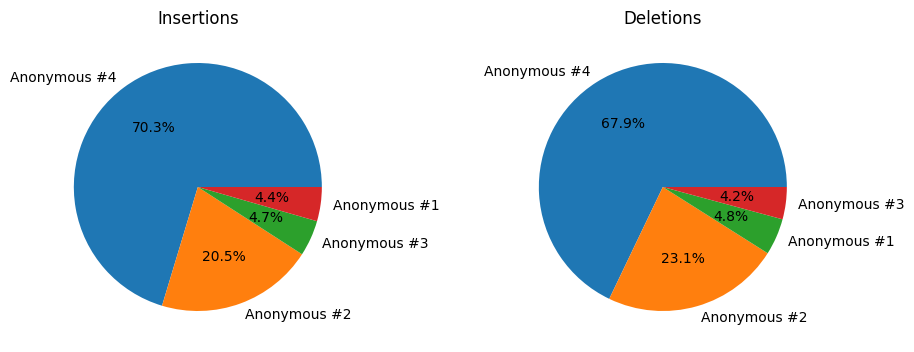

In [11]:
mura.insertions_deletions_info(insertions_deletions)

## Commit graph

Displays a graph of the commits in the repository. The range of the x-axis is computed from the starting commit date and the ending commit date.
To display only a section of the graph, the list can be sliced. This is generally useful when there are commits at the boundaries. Taking a section in the middle does not make much sense.

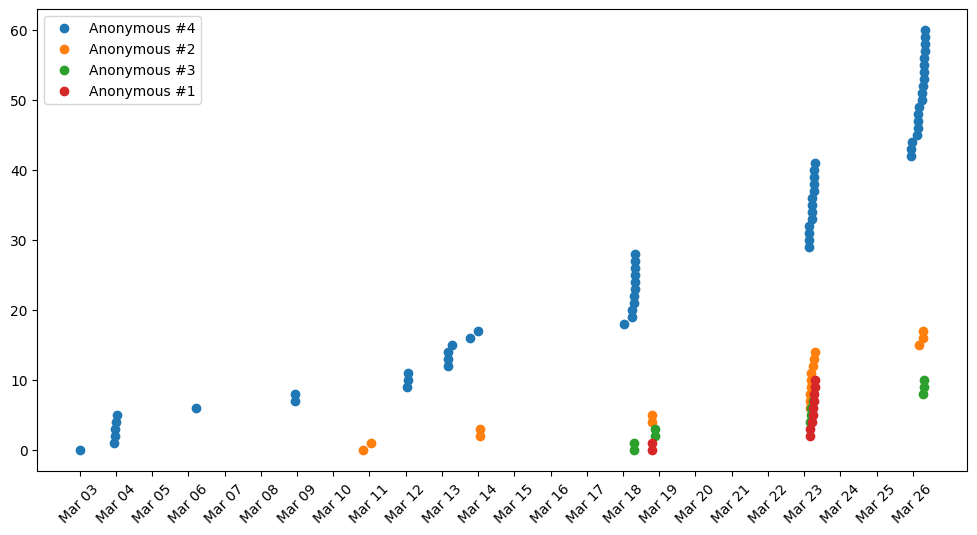

In [12]:
commits = [commit for commit in commit_range]

commits = commits[1:]  # remove first commit
# commits = commits[:10] # remove last 10 commits

mura.plot_commits(commits, commit_range, contributors, repository, force_x_axis_labels=False)

## File statistics

First part of the output is a combined statistics of all file changes in the repository.

- A: Files Added
- D: Files Deleted
- M: Files Modified
- R: Files Renamed

The statistics are cumulative. Meaning if a file is added and in any subsequent commit it is deleted, the file is counted towards both statistics.

In [13]:
flagged_files = mura.file_statistics_info(commit_range, contributors)

👨‍💻 ANON: Anonymous #1 <contributor1@email.cz>)
 => A - 7
 => R - 2
 => D - 0
 => M - 29
👨‍💻 ANON: Anonymous #2 <contributor2@email.cz>)
 => A - 27
 => R - 2
 => D - 5
 => M - 49
👨‍💻 ANON: Anonymous #3 <contributor3@email.cz>)
 => A - 9
 => R - 0
 => D - 0
 => M - 16
👨‍💻 ANON: Anonymous #4 <contributor4@email.cz>)
 => A - 158
 => R - 24
 => D - 35
 => M - 174


## Percentages and ownership

In [14]:
percentage, ownership = mura.percentage_info(history_analysis_result, contributors, config)

📊 Percentage of tracked files:

	ANON: Anonymous #4 <contributor4@email.cz>: 58.08%
	ANON: Anonymous #3 <contributor3@email.cz>: 10.15%
	ANON: Anonymous #1 <contributor1@email.cz>: 8.51%
	ANON: Anonymous #2 <contributor2@email.cz>: 23.26%
Files owned by 👨‍💻 Anonymous #4
	README.md (1)
	.gitignore (1)
	.mvn\wrapper\maven-wrapper.properties (1)
	mvnw (1)
	mvnw.cmd (1)
	pom.xml (1)
	.gitlab-ci.yml (0.6526315789473685)
	car_manager\pom.xml (1)
	common\pom.xml (1)
	component_init\pom.xml (0.6847826086956522)
	driver_init\pom.xml (0.6973684210526315)
	driver_manager\pom.xml (0.7349397590361446)
	car_manager\src\main\java\cz\muni\pa165\carmanager\App.java (1)
	component_init\src\main\java\cz\muni\pa165\componentinit\App.java (1)
	driver_init\src\main\java\cz\muni\pa165\driverinit\App.java (1)
	driver_manager\src\main\java\cz\muni\pa165\drivermanager\App.java (1)
	common\src\main\java\cz\muni\pa165\common\racecomponents\Car.java (0.38823529411764707)
	common\src\main\java\cz\muni\pa165\common\

## Ownership as a directory tree

In [15]:
mura.display_dir_tree(config, percentage, repository)

📁 Dir Tree with ownership:

├── README.md 👨‍💻 [Anonymous #4: 99%, Anonymous #3: 1%]
├── .gitignore 👨‍💻 [Anonymous #4: 100%]
├── .mvn
│   └── wrapper
│       └── maven-wrapper.properties 👨‍💻 [Anonymous #4: 100%]
├── mvnw 👨‍💻 [Anonymous #4: 100%]
├── mvnw.cmd 👨‍💻 [Anonymous #4: 100%]
├── pom.xml 👨‍💻 [Anonymous #4: 100%]
├── .gitlab-ci.yml 👨‍💻 [Anonymous #4: 65%, Anonymous #3: 12%, Anonymous #1: 12%, Anonymous #2: 12%]
├── car_manager 👨‍💻 [Anonymous #4: 69%, Anonymous #2: 8%, Anonymous #3: 23%]
│   ├── pom.xml 👨‍💻 [Anonymous #4: 85%, Anonymous #2: 15%]
│   └── src 👨‍💻 [Anonymous #4: 54%, Anonymous #2: 0%, Anonymous #3: 45%]
│       ├── main 👨‍💻 [Anonymous #4: 99%, Anonymous #2: 1%]
│       │   ├── java
│       │   │   └── cz
│       │   │       └── muni
│       │   │           └── pa165
│       │   │               └── carmanager 👨‍💻 [Anonymous #4: 98%, Anonymous #2: 2%]
│       │   │                   ├── App.java 👨‍💻 [Anonymous #4: 90%, Anonymous #2: 10%]
│       │   │                   

## Blanks and Comments

In [ ]:
mura.blanks_comments_info(commit_range, history_analysis_result, tracked_files, contributors)

## Unmerged commits

In [27]:
commit_range.unmerged_commits_info(repository, contributors)

⚠️ Unmerged branch: origin/car_manager_tests
6c7fb87df5cc99f788c3c8ab04f78b7f81aa6353 ➡️ ⬆️ Commit: checkstyle fix (Anonymous #4)
                   ⬇️                   
994ec5eaf373ce8c7bd386a10b08946074b1910c ➡️ ⬆️ Commit: wip (Anonymous #4)
                   ⬇️                   
01b16633e9f3ed28be7af483db738c56e067a17b ➡️ ⬆️ Commit: Merge branch 'milestone_1' into car_manager_tests (Anonymous #4)
                   ⬇️                   
76761ffd1451a0469ad69b3c6583f6cd4a34bff4 ➡️ ⬆️ Commit: wip (Anonymous #4)
                   ⬇️                   
e319371767e42840a31d6237bb9ef7bc8ab19a66 ➡️ ⬆️ Commit: checkstyle fix (Anonymous #4)


## Rules

In [17]:
rule_violation_weight_multipliers = mura.rule_info(config, ownership)

📜 Rules: 

All contributors must have at least 1 file/s matching: `.*Controller.*\.java` in a directory matching: `*`
All contributors must have at least 1 file/s matching: `.*Test.*\.java` in a directory matching: `*`
All contributors must have at least 1 file/s matching: `pom\.xml` in a directory matching: `*`

🚫 Violated Rules: 

❌ Contributor ANON: Anonymous #3 <contributor3@email.cz> did not fulfill the following requirements:
	All contributors must have at least 1 file/s matching: `pom\.xml` in a directory matching: `*`
❌ Contributor ANON: Anonymous #1 <contributor1@email.cz> did not fulfill the following requirements:
	All contributors must have at least 1 file/s matching: `.*Test.*\.java` in a directory matching: `*`
	All contributors must have at least 1 file/s matching: `pom\.xml` in a directory matching: `*`
❌ Contributor ANON: Anonymous #2 <contributor2@email.cz> did not fulfill the following requirements:
	All contributors must have at least 1 file/s matching: `pom\.xml` i

## Syntax

In [18]:
syntactic_weights = mura.syntax_info()

📖 Syntax:

ℹ️ TODO


## Semantics

In [19]:
semantic_weights = mura.semantic_info(tracked_files, ownership, semantic_analysis_grouped_result)

📚 Semantics:

📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team
Total files: 8
🏆 Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team\.mvn\wrapper
Total files: 1
🏆 Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team\car_manager
Total files: 1
🏆 Total weight: 0.0
📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team\car_manager\src\main\java\cz\muni\pa165\carmanager
Total files: 1
File: App.java: Owner: Anonymous #4
Contents: Classes: 1 Functions: 1 Properties: 0 Fields: 0 Comments: 1 
🏆 Semantic file weight: 58.0
🏆 Total weight: 58.0
📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team\car_manager\src\main\java\cz\muni\pa165\carmanager\data\repository
Total files: 1
File: ConfigRepository.java: Owner: Anonymous #4
Contents: Classes: 1 Functions: 2 Properties: 0 Fields: 0 Comments: 2 
🏆 Semantic file weight: 59.0
🏆 Total weight: 59.0
📦 Group: C:\MUNI\last\Java\M1\pa165-formula-one-team\car_manager\src\main\java\cz\muni\pa165\carmanager\facade
Total

## Remote repository

In [20]:
repo_management_weights = mura.remote_info(commit_range, repository, config, contributors)

🌐 Remote repository management:

ℹ️ Skipping as 'config.ignore_remote_repo = True'


## Summary

In [21]:
mura.summary_info(contributors, syntactic_weights, semantic_weights, repo_management_weights, rule_violation_weight_multipliers)



🏆 Total weight per contributor for 📖 Syntax:
ℹ️ Nothing to show here...


🏆 Total weight per contributor for 📚 Semantics:
 -> Anonymous #1: 272.75
 -> Anonymous #2: 498.5
 -> Anonymous #3: 324.25
 -> Anonymous #4: 1634.75


🏆 Total weight per contributor for 🌐 Remote repository management:
ℹ️ Nothing to show here...


🏆⚠️ Weight multiplier for unfulfilled 📜 Rules:
 -> Anonymous #1: 0.9
 -> Anonymous #2: 0.9
 -> Anonymous #3: 0.9


🏆 Total weight per contributor:
1️⃣ -> Anonymous #4: 1634.75
2️⃣ -> Anonymous #2: 448.65000000000003
3️⃣ -> Anonymous #3: 291.825
4️⃣ -> Anonymous #1: 245.475
